In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,classification_report

In [2]:
df = pd.read_csv("emails.csv")

In [3]:
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [4]:
df.shape

(5172, 3002)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [6]:
df.isna().sum().sum()

0

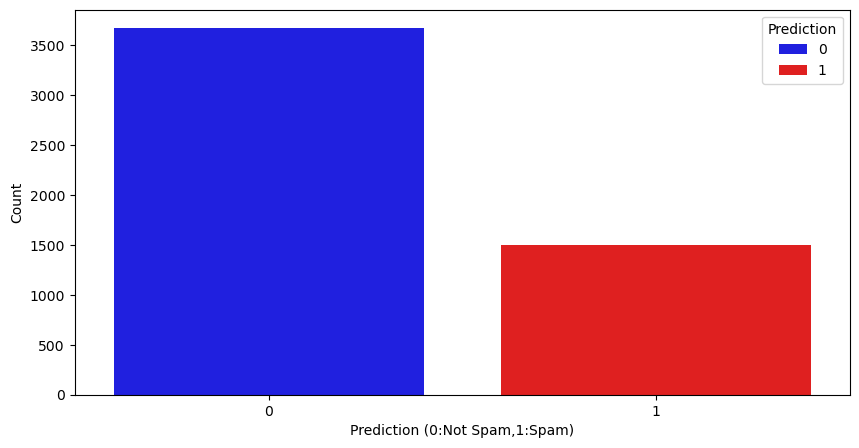

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(x="Prediction",hue = "Prediction",data=df,palette =["blue","red"])
plt.xlabel("Prediction (0:Not Spam,1:Spam)")
plt.ylabel("Count")
plt.show()

In [8]:
df["Prediction"].value_counts()

Prediction
0    3672
1    1500
Name: count, dtype: int64

In [9]:
train,test = train_test_split(df,test_size = 0.20,random_state =0)
x_train , y_train = train.drop(["Email No.","Prediction"],axis =1).values ,train["Prediction"].values
x_test , y_test = test.drop(["Email No.","Prediction"],axis =1).values ,test["Prediction"].values

In [10]:
sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**KNN**

In [12]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [13]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [14]:
y_pred_knn = knn.predict(x_test)

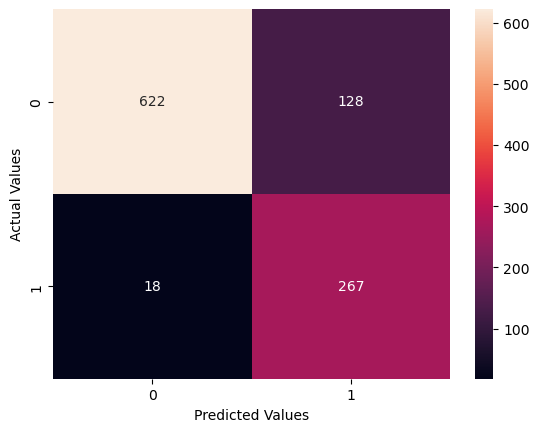

In [15]:
cf = confusion_matrix(y_test,y_pred_knn)
sns.heatmap(cf,annot=True,fmt="d")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [16]:
accuracy = accuracy_score(y_test,y_pred_knn)
precision = precision_score(y_test,y_pred_knn)
f1 = f1_score(y_test,y_pred_knn)
recall = recall_score(y_test,y_pred_knn)
print("Accuracy : ",accuracy)
print("Precision : ",precision)
print("Recall : ",recall)
print("F1 Score : ",f1)

Accuracy :  0.8589371980676328
Precision :  0.6759493670886076
Recall :  0.9368421052631579
F1 Score :  0.7852941176470588


**SVC**

In [18]:
svc = SVC(kernel ="linear")

In [19]:
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [20]:
y_pred_svc = svc.predict(x_test)

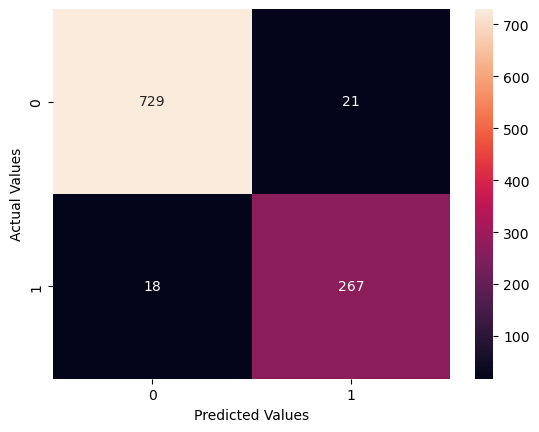

In [21]:
cf = confusion_matrix(y_test,y_pred_svc)
sns.heatmap(cf,annot=True,fmt="d")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [22]:
accuracy = accuracy_score(y_test,y_pred_svc)
precision = precision_score(y_test,y_pred_svc)
f1 = f1_score(y_test,y_pred_svc)
recall = recall_score(y_test,y_pred_svc)
print("Accuracy : ",accuracy)
print("Precision : ",precision)
print("Recall : ",recall)
print("F1 Score : ",f1)

Accuracy :  0.9623188405797102
Precision :  0.9270833333333334
Recall :  0.9368421052631579
F1 Score :  0.9319371727748691
